# 신입교육세션 과제1 : 서울 종합병원 분포 확인하기

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

##### *필요한 라이브러리 불러오기
##### *seaborn: 데이터 시각화를 위한 라이브러리 

#### 시각화를 위한 폰트 설정

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\강태희\AppData\Local\Temp\ipykernel_13036\1557408062.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


##### *matplotlib: 데이터 시각화 라이브러리
##### *%matplotlib inline: 그래프가 노트북 안에 보이게 하기 위해
##### *plt.rc('font', family='Malgun Gothic'): 한글깨짐 방지
##### *plt.rc('axes', unicode_minus=False): 마이너스 기호 깨짐 방지
##### *폰트가 선명하게 보이도록 설정

### 1.3 데이터 로드하기

In [4]:
df=pd.read_csv("C:/users/강태희/Documents/data/소상공인시장진흥공단_상가업소정보_의료기관_201909/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df.shape

(91335, 39)

##### *read_csv "파일명"으로 데이터 불러오기
##### *low_memory=False : 대용량의 데이터를 불러오는 경우 사용
##### *shape: (행,열) 순으로 데이터의 크기 출력

#### 데이터 미리보기


##### *head(): 불러온 데이터의 상위 5개의 행을 출력
##### *tail(): 불러온 데이터의 하위 5개의 행을 출력
##### *sample(): 랜덤하게 행을 추출

In [4]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [11]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [12]:
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
68548,25218889,신동한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,2720010300115830008000001,관문빌딩,대구광역시 남구 대명서로 165,705030.0,42498.0,11,NaN,NaN,128.55644,35.834631


### 데이터 요약하기

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

##### *요약정보: df.info() 

In [15]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

##### *컬럼명 확인: df.columns

In [16]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

##### *데이터타입 확인: df.dtypes

### 결측치 확인하기

In [17]:
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


##### *df.isnull() : 데이터 안에 들어있는 값이 null인지 확인할 수 있음
##### *isnull() 메소드는 관측치가 결측이면 True, 결측이 아니면 False의 boollean 값을 반환

In [19]:
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

##### *isnull().sum(): 행 단위로 결측값 개수 구하기

### 위에서 구한 결측치를 변수에 담고 변수.plot.bar 를 통해 막대그래프로 표현해보기
##### *차이를 보고 싶을 때 그래프를 통해 시각화하기

In [5]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

##### *행 단위로 구한 결측값의 수를 변수에 할당함

<Axes: >

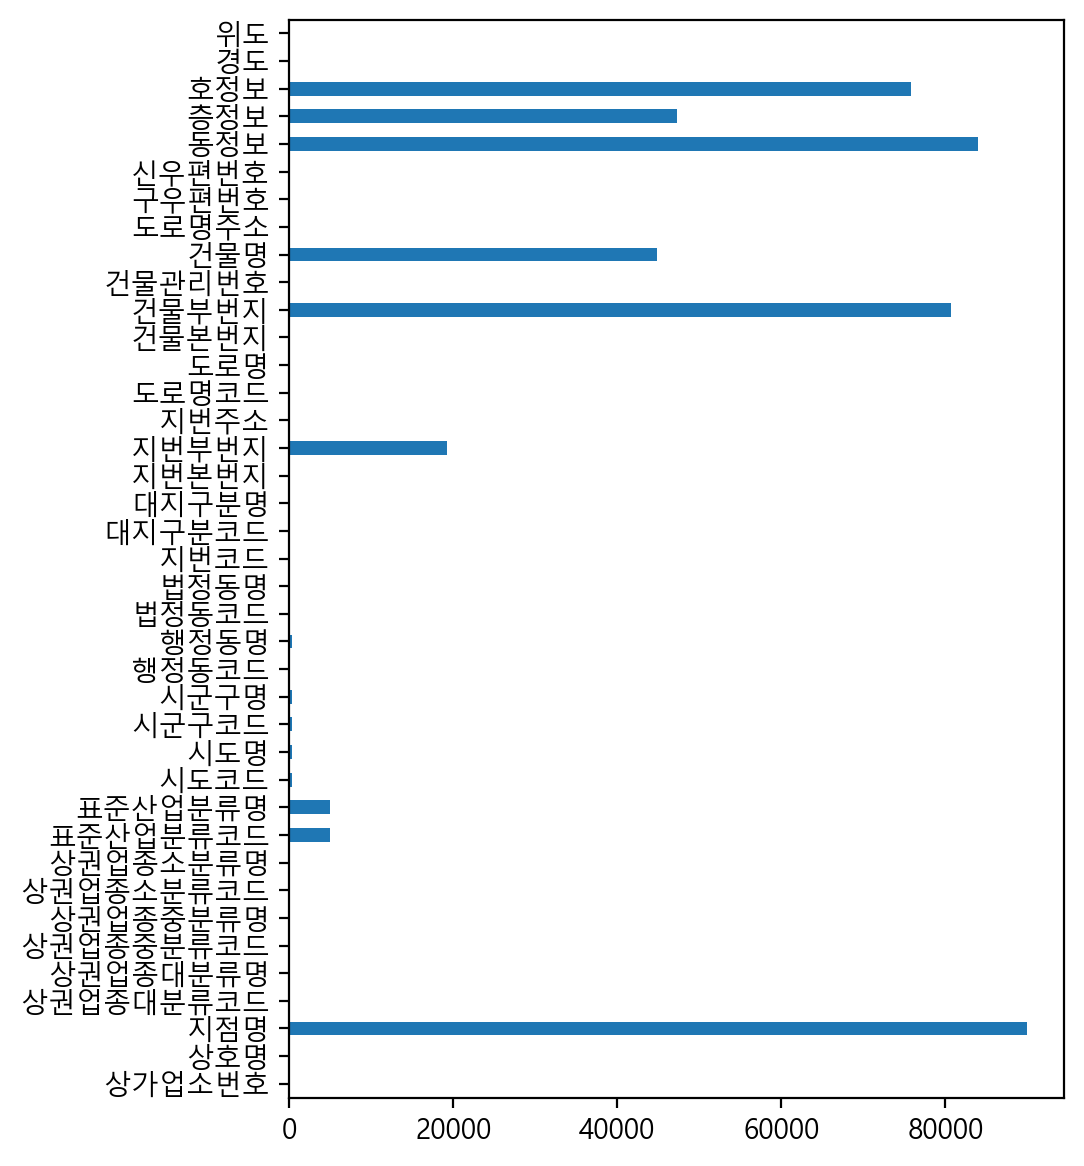

In [24]:
null_count.plot.barh(figsize=(5,7))

##### *행별로 나타나는 결측값의 수를 bar plot으로 나타냄
##### *plot.barh(): 범주가 있는 데이터 값을 수평 막대로 표현
##### *plot.()에서 적합한 그래프 사용할 것
##### *rot= : 글자를 원하는 각도로 회전시킴
##### *figsize: 그래프 사이즈 조정 

In [25]:
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


##### *위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어주기
##### *df_null_count 변수에 결과를 담아 head로 미리보기 가능

### 컬럼명 변경하기

In [27]:
df_null_count.columns=["컬럼명","결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


##### *기본 컬럼명은 index, 0 이기에 "컬럼명" ,"결측치수"로 수정할 것

### 정렬하기
##### *sort_values : 값을 기준으로 레이블을 정렬하는 메서드
##### *df_null_count 에 있는 결측치수 칼럼을 sort_values를 통해 정렬한다
##### *ascending=False : 결측치가 많은 순으로 출력하고 싶다면 

In [28]:
df_null_count.sort_values(by="결측치수")

,컬럼명,결측치수
0,상가업소번호,0
31,도로명주소,0
29,건물관리번호,0
27,건물본번지,0
26,도로명,0
25,도로명코드,0
24,지번주소,0
22,지번본번지,0
21,대지구분명,0
20,대지구분코드,0


In [30]:
df_null_count.sort_values(by="결측치수", ascending=False)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [31]:
df_null_count.sort_values(by="결측치수",ascending=False).head(10)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


##### *결측치 수가 많은 순으로 상위 10개만 출력

### 특정 칼럼만 불러오기

In [32]:
df_null_count["컬럼명"]

0        상가업소번호
1           상호명
2           지점명
3     상권업종대분류코드
4      상권업종대분류명
5     상권업종중분류코드
6      상권업종중분류명
7     상권업종소분류코드
8      상권업종소분류명
9      표준산업분류코드
10      표준산업분류명
11         시도코드
12          시도명
13        시군구코드
14         시군구명
15        행정동코드
16         행정동명
17        법정동코드
18         법정동명
19         지번코드
20       대지구분코드
21        대지구분명
22        지번본번지
23        지번부번지
24         지번주소
25        도로명코드
26          도로명
27        건물본번지
28        건물부번지
29       건물관리번호
30          건물명
31        도로명주소
32        구우편번호
33        신우편번호
34          동정보
35          층정보
36          호정보
37           경도
38           위도
Name: 컬럼명, dtype: object

### 기초통계량 값 계산

In [6]:
df['위도'].mean()

36.62471119236685

##### *mean(): 평균값 구하기
##### *df 데이터의 '위도' 값들의 평균값을 구함

In [7]:
df['위도'].median()

37.2346523177033

##### *median(): 중앙값 구하기
##### *df 데이터의 '위도' 값들의 중앙값을 구함

In [8]:
df['위도'].max()

38.4996585705598

##### *max(): 최댓값 구하기
##### *df 데이터의 '위도' 값들의 최댓값을 구함

In [9]:
df['위도'].min()

33.2192896688307

##### *min(): 최솟값 구하기
##### *df 데이터의 '위도' 값들의 최솟값을 구함

In [10]:
df['위도'].count()

91335

##### *count(): 개수 구하기
##### *df 데이터의 '위도' 값들의 개수 구함

### 기초통계값 요약하기

In [11]:
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

##### *descibe: 통계적인 수치를 보여주는 것
##### *describe을 사용하면 데이터를 요약할 수 있음. 기본적으로 수치형 데이터를 요약해서 보여줌.
##### *ex: 데이터의 갯수, 평균, 표준편차, 최소값, 최댓값, 사분위수 등

##### *컬럼 2개를 가져올 때 리스트 형태로 가져와야한다. ex : df[['칼럼1','칼럼2']]

In [14]:
df[['위도','경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


##### *describe(include='number') :수치형 데이터만 가져와 요약함
##### *describe(include='object') : 뮨자형 데이터타입의 요약함

In [15]:
df.describe(include='object')

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,91335,1346,91335,91335,91335,91335,91335,91335,86413,86413,...,91280,91335,91335,91335,91335,46453,91335,7406,44044,15551
unique,56910,858,1,1,5,5,34,34,15,15,...,2822,2,53118,16610,54142,17946,54031,556,74,849
top,리원,장례식장,S,의료,S01,병원,S02A01,약국,Q86201,일반 의원,...,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,현대아파트,서울특별시 동대문구 약령중앙로8길 10,1,1,1
freq,152,97,91335,91335,60774,60774,18964,18964,22555,22555,...,874,91213,198,326,198,131,198,1571,15994,1286


##### *'리원'이라는 상호명이 가장 많이 나오는걸 확인할 수 있음. 
##### *도로명주소는 강남대로가 가장 많은걸 확인할 수 있음.
##### *결측치는 제외하고 보여줌.

In [16]:
df.describe(include='number')

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,72079.000000,9.133500e+04,91335.000000,10604.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32.586712,32898.381877,3.293232e+09,3.293385e+09,3.293191e+18,1.001336,587.534549,17.005092,3.293207e+11,251.200482,7.241135,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,13.045138,12985.393171,1.297387e+09,1.297706e+09,1.297393e+18,0.036524,582.519364,53.451413,1.297391e+11,477.456487,12.426816,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11.000000,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,0.000000,1.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26.000000,26350.000000,2.635065e+09,2.635011e+09,2.635011e+18,1.000000,162.000000,2.000000,2.635042e+11,29.000000,1.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41.000000,41117.000000,4.111758e+09,4.111710e+09,4.111711e+18,1.000000,462.000000,5.000000,4.111743e+11,92.000000,2.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43.000000,43113.000000,4.311370e+09,4.311311e+09,4.311311e+18,1.000000,858.000000,14.000000,4.311332e+11,257.000000,9.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50.000000,50130.000000,5.013061e+09,5.013032e+09,5.013061e+18,2.000000,7338.000000,1428.000000,5.013049e+11,8795.000000,244.000000,799801.000000,63643.00000,130.909912,38.499659


### 중복제거한 값 보기
##### *unique(): 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수
##### *nunique(): 데이터에 고유값들의 수를 출력해주는 함수
##### *unique로 중복을 제거한 값을 보고 nunique로 수를 세어본다

In [17]:
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

##### *상권업종대분류명은 unique값으로 봤을 떄 의료만 포함하는걸 확인할 수 있음 (의료기관만 있기 때문)

In [18]:
df['상권업종대분류명'].nunique()

1

##### *의료라는  데이터는 한번 등장한다는걸 확인할 수 있음

In [19]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

##### *nunique 대신 len 사용 가능
##### *len() : Python에서 객체(문자열, 리스트, 튜플 등)의 길이나 크기를 반환하는 함수

In [4]:
len(df['상권업종중분류명'].unique())

5

### 그룹화된 요약값 보기 -values_counts
##### *value_counts를 사용하면 카테고리 형태의 데이터 갯수를 세워볼 수 있음
##### *value_counts: 지정된 열의 각 값(value)에 대한 모든 발생 횟수를 반환

##### *시도명의 각 값에 대한 개수 확인 가능

In [9]:
city=df['시도명'].value_counts()
city

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

##### *normalize=True 옵션을 사용하면 비율을 구할 수 있음
##### *각각의 데이터가 전체에서 어느정도를 차지하는지 볼 수 있음

In [8]:
city_normalize=df['시도명'].value_counts(normalize=True)
city_normalize

시도명
경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: proportion, dtype: float64

##### *'시도명' 속 각각의 데이터가 전체에서 차지하는 비율을 확인함

##### *위에서 분석한 시도명 수를 막대그래프로 표현하기
##### *plot 함수의 기본 형태는 line이므로 데이터에 맞는 차트를 선택할 것

<Axes: ylabel='시도명'>

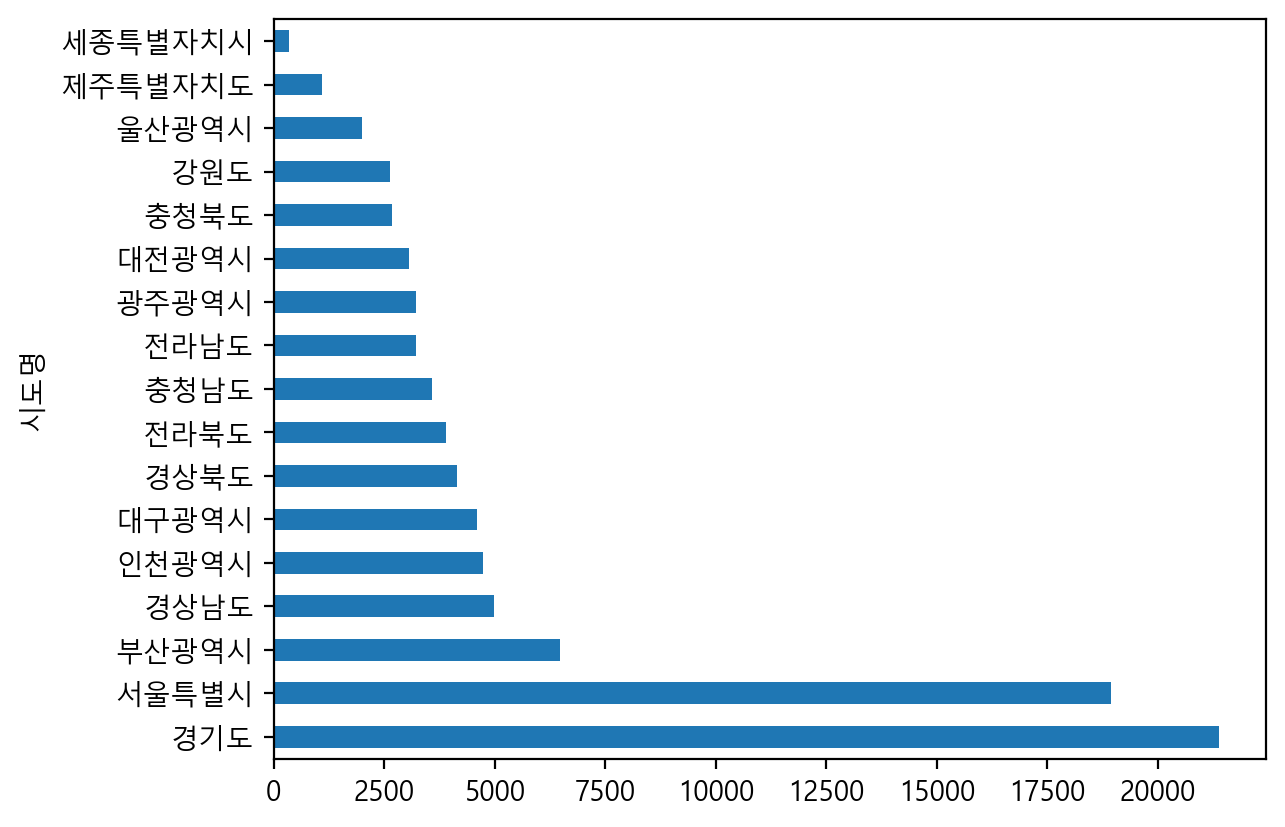

In [10]:
city.plot.barh()

##### *데이터를 봤을 때 얼만큼 많고 작은지의 차이를 확인하기 어려우므로 여기서 pie 차트는 적절하지 않음
##### *수치를 따로 표시하지 않으면 알아보기 어려움

<Axes: ylabel='proportion'>

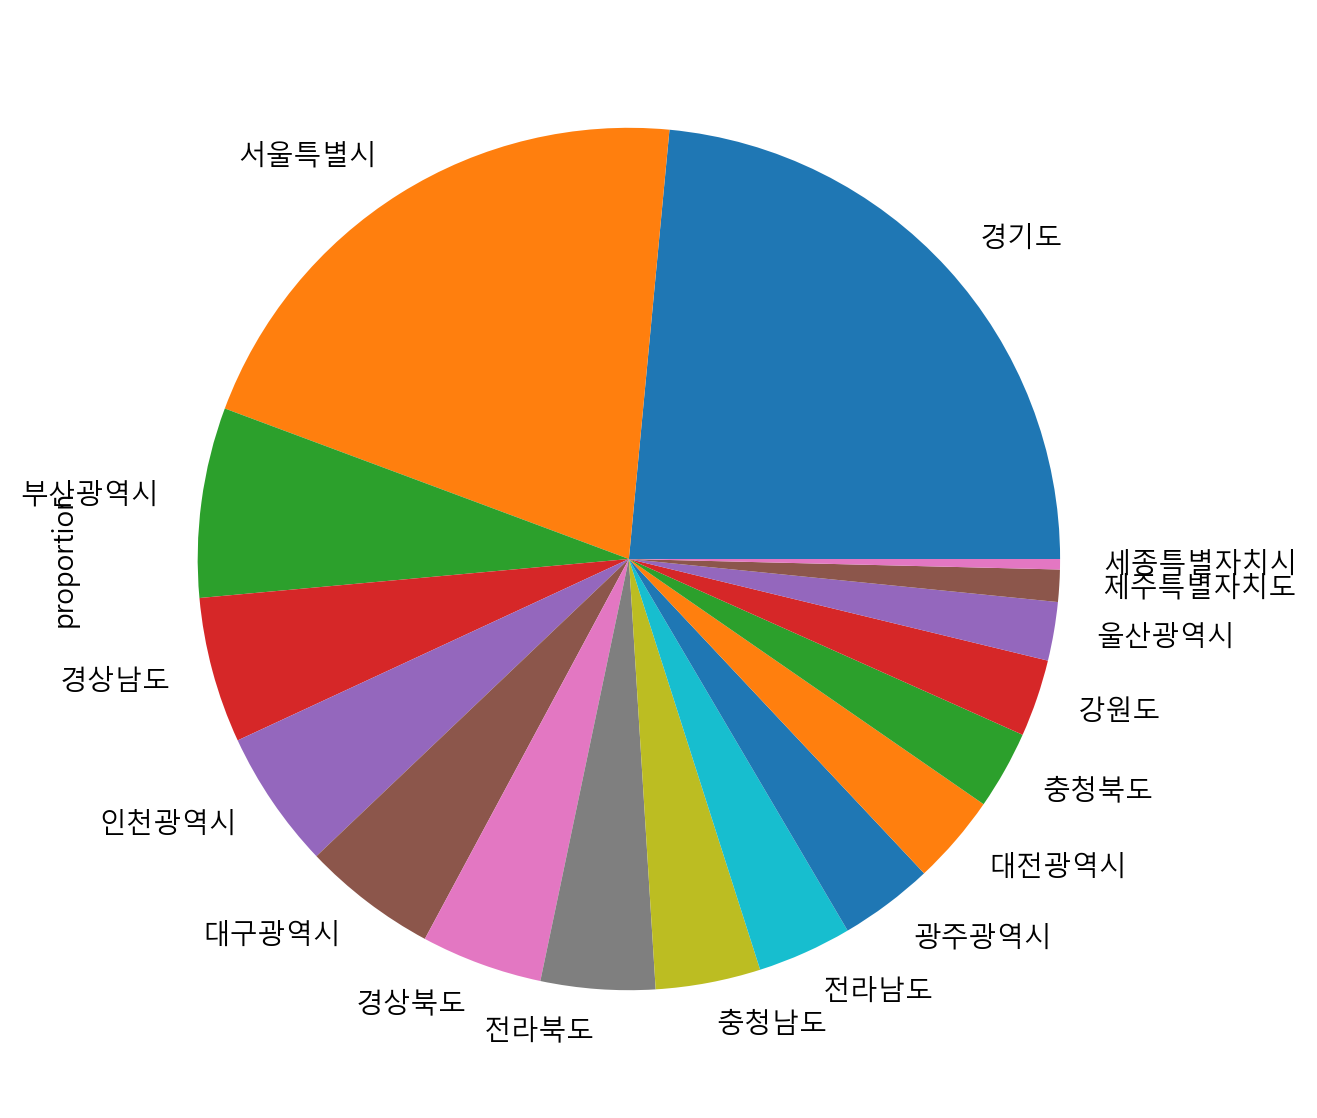

In [13]:
city_normalize.plot.pie(figsize=(7,7))

##### *seaborn의 countplot으로 그래프 그리기 (x축을 '시도명'으로 지정)

<Axes: xlabel='시도명', ylabel='count'>

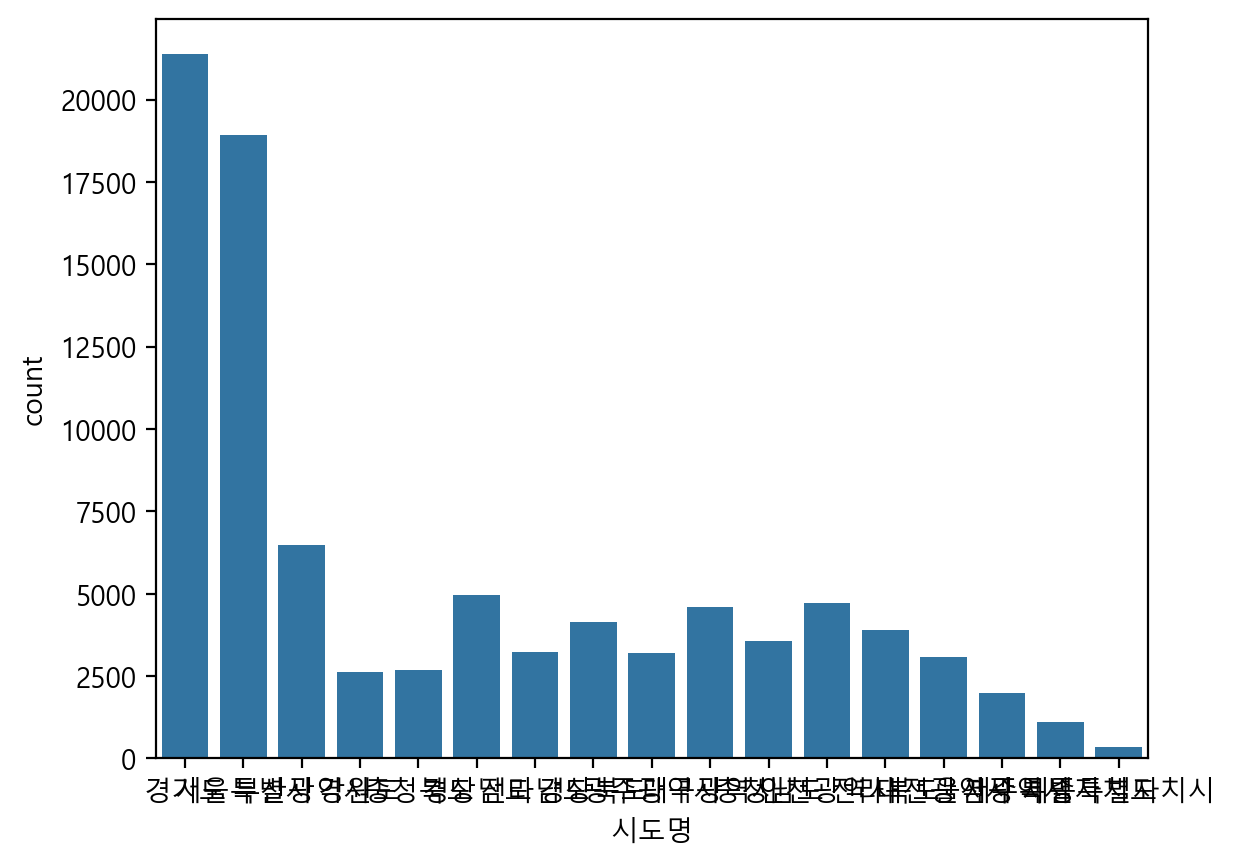

In [14]:
sns.countplot(data=df, x='시도명')

##### *seaborn의 countplot으로 그래프 그리기 (y축을 '시도명'으로 지정)
##### *x축을 '시도명'으로 지정한 것보다 y축을 '시도명'으로 지정한 것이 시각적으로 확인하기 더 편함

<Axes: xlabel='count', ylabel='시도명'>

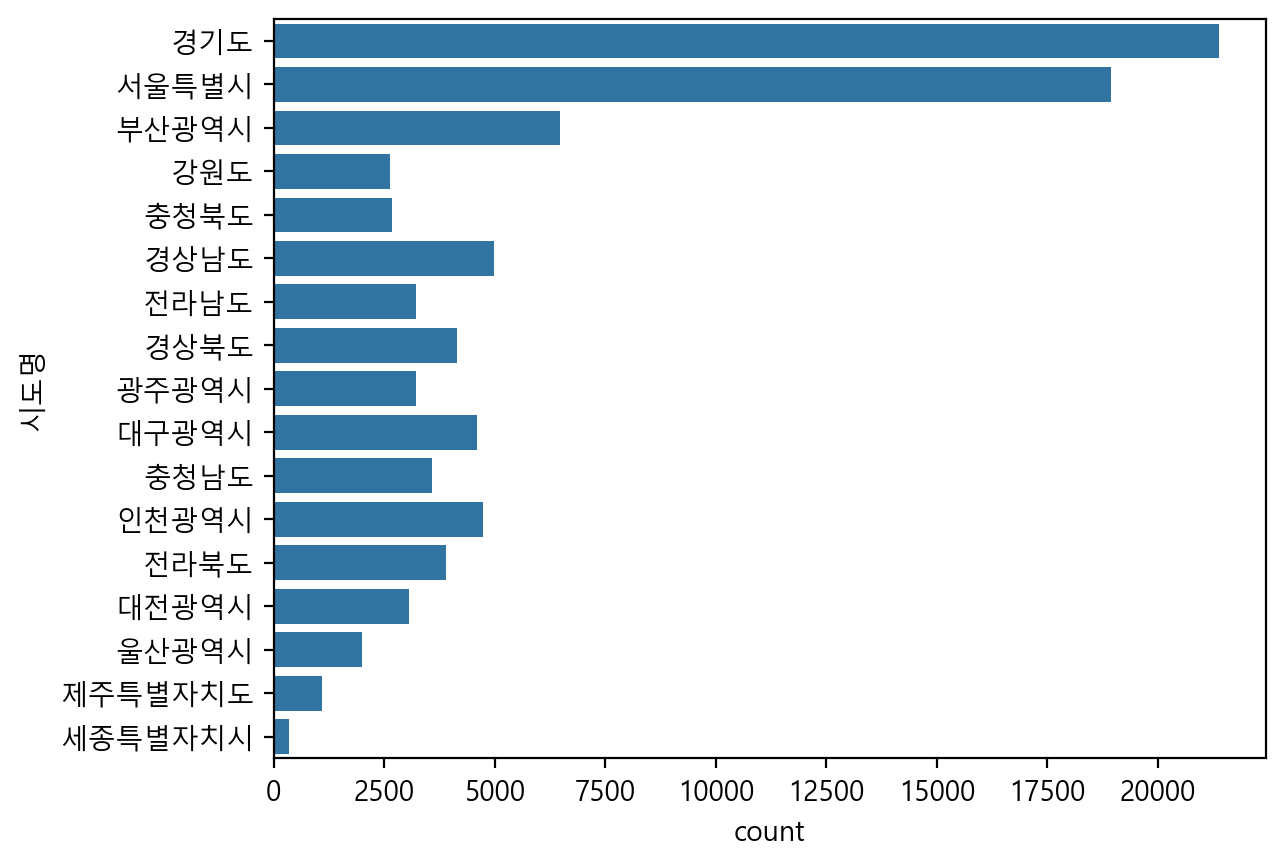

In [15]:
sns.countplot(data=df, y='시도명')

##### *'상권업종중분류명'으로 개수를 세어보기

In [20]:
c=df['상권업종중분류명'].value_counts()
c

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

##### *normalize=True를 통해 상권업종중분류명으로 비율을 구함

In [21]:
n=df['상권업종중분류명'].value_counts(normalize=True)
n

상권업종중분류명
병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: proportion, dtype: float64

##### *plot.bar()을 사용해서 막대그래프 그리기
##### *이 때 글자가 돌아가있으므로 rot=0으로 설정하여 글자 회전시킴

<Axes: xlabel='상권업종중분류명'>

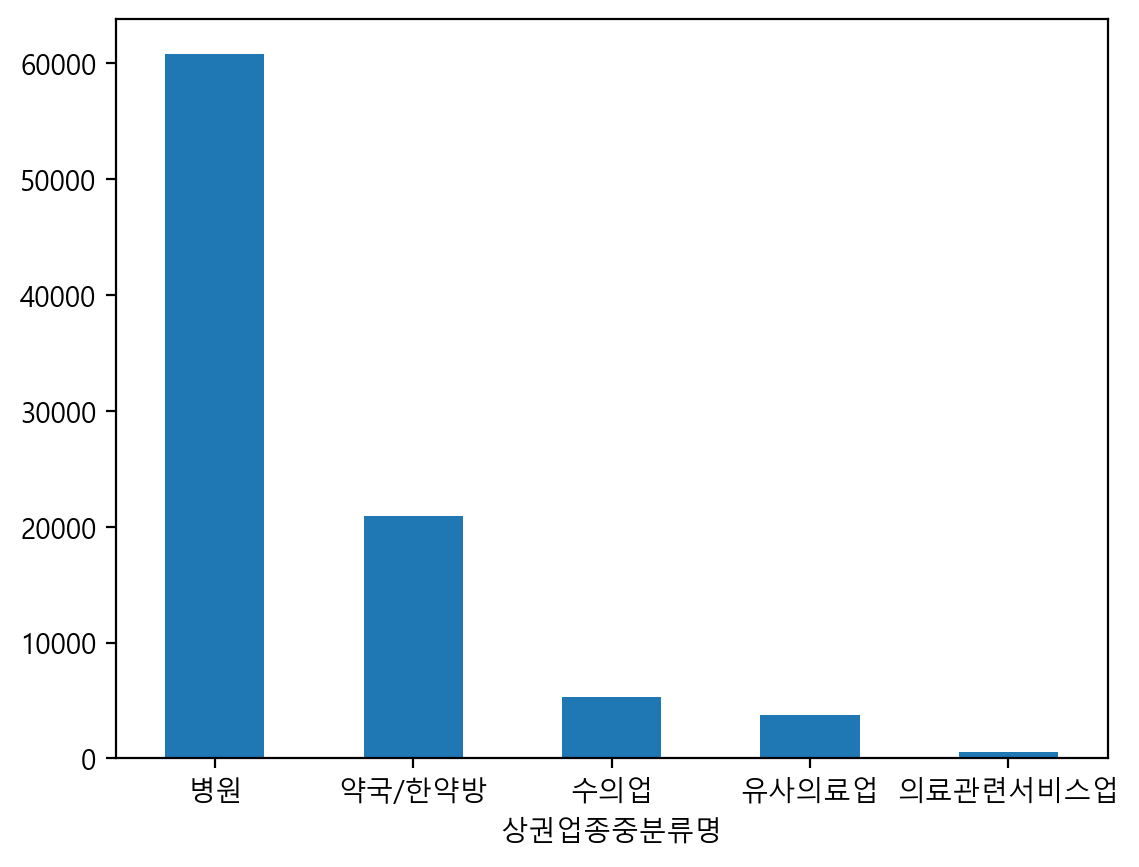

In [23]:
c.plot.bar(rot=0)

##### *pie 차트로 상권업종중분류명의 비율을 나타냄

<Axes: ylabel='proportion'>

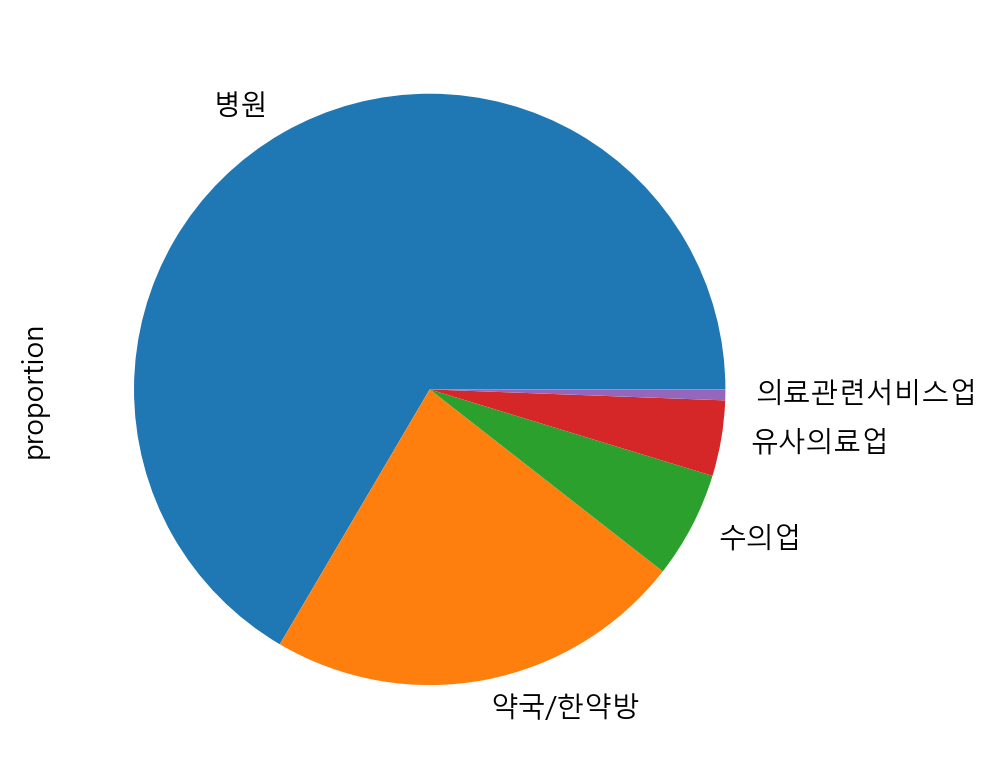

In [24]:
n.plot.pie()

##### *상권업종소분류명의 갯수 확인하여 d라는 변수에 할당함

In [5]:
d=df['상권업종소분류명'].value_counts()
d

상권업종소분류명
약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: count, dtype: int64

##### *수평 막대 그래프로 '상권업종소분류명'의 개수를 나타냄

<Axes: ylabel='상권업종소분류명'>

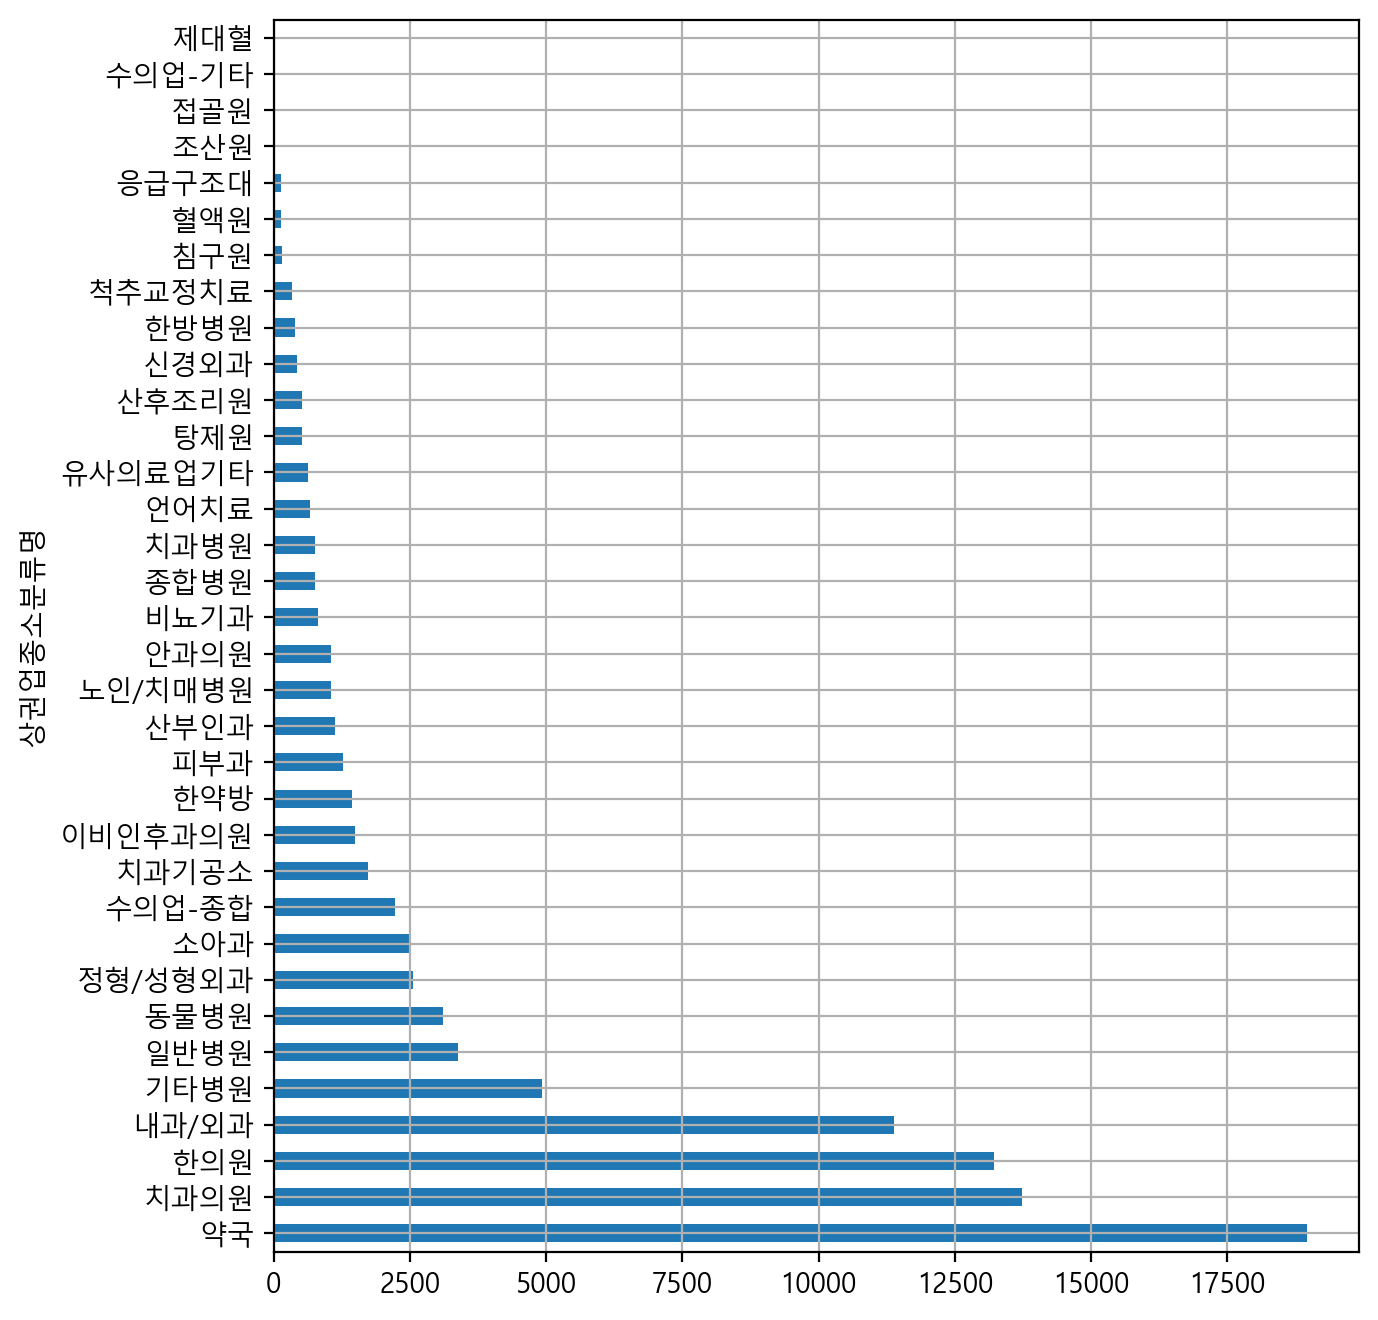

In [28]:
d.plot.barh(figsize=(7,8), grid=True)

##### *grid=True: 프로그램에 데이터를 엑셀과 같은 표 형식으로 보여줌
##### *figsize로 그래프 크기 조절 가능

### 데이터 색인하기

##### *'상권업종중분류명'이 '약국/한약방'인 데이터만 가져와서 df_medical이라는 변수로 지정함
##### *원본 데이터프레임과 독립적인 사본을 만듦. 나중에 df_medical을 수정해도 df에는 영향을 주지 않음
##### *df에서 '상권업종중분류명'이 '약국/한약방'인 데이터만 추출해서 독립적인 복사본을 df_medical이라는 새 데이터프레임에 저장

In [30]:
df_medical= df[df['상권업종중분류명'] == '약국/한약방'].copy()
df_medical

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
6,20733252,춘산한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4211010500101000000023668,NaN,강원도 춘천시 낙원길 50,200042.0,24273.0,NaN,2,NaN,127.726905,37.880504
7,20582210,부부탕제원,NaN,S,의료,S02,약국/한약방,S02A03,탕제원,G47859,...,4311112000101870017042942,NaN,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,NaN,1,NaN,127.499206,36.625355
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4889046030200780002048274,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962
13,21217689,제중당한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4683035023102960000000001,NaN,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,NaN,NaN,NaN,126.630348,34.834080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91312,16131397,큰나무약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4128110600107000011013834,신원당빌딩,경기도 고양시 덕양구 고양대로 1361,412807.0,10464.0,NaN,1,NaN,126.835684,37.655048
91321,16130841,복음약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,2729012400102760000029818,그린맨션3차아파트,대구광역시 달서구 구마로36길 33,704752.0,42735.0,301,NaN,105,128.547352,35.836250
91322,16091491,설연화한복감성약방,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1126010400101740001009985,NaN,서울특별시 중랑구 공릉로 28,131848.0,2034.0,NaN,NaN,NaN,127.078082,37.613194
91324,16109731,위례수약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4113110800101810002000002,NaN,경기도 성남시 수정구 위례서일로 18,461210.0,13647.0,NaN,1,NaN,127.137870,37.465260


##### *'상권업종대분류명'에서 '의료'만 가져오기
##### *loc: 데이터 프레임의 행 또는 칼럼의 label이나 boolean array로 인덱싱
##### *df.loc를 사용하여 행, 열을 함께 가져올 수 있음- '상권업종중분류명'을 가져오기
##### *value_counts()를 통해 중분류의 갯수 반환

In [32]:
df.loc[df["상권업종대분류명"]== "의료","상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

##### *shape: DataFrame 객체의 차원의 형태를(레이블 정보)를 튜플의 형식으로 반환
##### *상권업종중분류명이 유사의료업인 데이터를 튜플 형식으로 반환함

In [34]:
df[df['상권업종중분류명']=='유사의료업'].shape

(3774, 39)

##### *value_counts를 통해 '상호명'을 그룹화해서 개수를 세어봄, 상위 10개 추출

In [ ]:
df['상호명'].value_counts().head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

### 여러 조건으로 색인하기
##### *and 조건일 때는 &, or 조건일 때는 / 사용하기

##### *'상권업종소분류명'이 '약국'인 것과 '시도명'이 '서울특별시'인 데이터만 가져와 df_seoul_drug 변수에 할당함

In [39]:
df_seoul_drug=df[(df['상권업종소분류명']=='약국') & (df['시도명']=='서울특별시')]
print(df_seoul_drug)
df_seoul_drug

         상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
33     20816709      이즈타워약  NaN         S       의료       S02   약국/한약방   
51     20855710       진흥약국  NaN         S       의료       S02   약국/한약방   
130    21589838      신세계약국  NaN         S       의료       S02   약국/한약방   
136    22388303    메디팜한솔약국  NaN         S       의료       S02   약국/한약방   
141    22412563        명약국  NaN         S       의료       S02   약국/한약방   
...         ...        ...  ...       ...      ...       ...      ...   
91239  16131547     우리이웃약국  NaN         S       의료       S02   약국/한약방   
91275  16195709     더블유스토어  세계로         S       의료       S02   약국/한약방   
91288  16131839      종각팜약국  NaN         S       의료       S02   약국/한약방   
91301  16188650      온누리약국  우리네         S       의료       S02   약국/한약방   
91322  16091491  설연화한복감성약방  NaN         S       의료       S02   약국/한약방   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
33       S02A01       약국   G47811  ...  11680101001082

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
33,20816709,이즈타워약,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1168010100108210001000001,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,1,NaN,127.028023,37.498656
51,20855710,진흥약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1174010600106090000000001,둔촌푸르지오아파트,서울특별시 강동구 명일로 172,134767.0,5360.0,NaN,NaN,NaN,127.145055,37.534135
130,21589838,신세계약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1126010600106460000000300,금강리빙스텔,서울특별시 중랑구 신내로 211,131130.0,2024.0,NaN,1,NaN,127.092597,37.616424
136,22388303,메디팜한솔약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1120010700103460012016935,한진노변상가,서울특별시 성동구 행당로 82,133777.0,4717.0,NaN,1,NaN,127.027513,37.556238
141,22412563,명약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1123010900102860121007257,NaN,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,NaN,1,NaN,127.060556,37.587349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91239,16131547,우리이웃약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1129013500100340003022753,종암선경아파트,서울특별시 성북구 종암로5길 26,136769.0,2811.0,NaN,1,116,127.033908,37.594792
91275,16195709,더블유스토어,세계로,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1153010200105010000000001,신구로자이나인스에비뉴,서울특별시 구로구 구로중앙로 134,152731.0,8293.0,1,1,NaN,126.884285,37.499936
91288,16131839,종각팜약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1111013800100160006014311,대한기독교서회,서울특별시 종로구 종로 68,110122.0,3189.0,NaN,1,NaN,126.984930,37.569882
91301,16188650,온누리약국,우리네,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1153010200107980032000001,NaN,서울특별시 구로구 디지털로27길 116,152875.0,8374.0,NaN,NaN,NaN,126.888070,37.484897


##### '상권업종소분류명'이 '종합병원'인 것과 '시도명'이 '서울특별시'인 데이터만 가져와 df_seoul_hospital에 변수 지정

In [6]:
df_seoul_hospital =df[(df['상권업종소분류명'] == '종합병원') & (df['시도명'] == '서울특별시')].copy()
df_seoul_hospital

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048
353,20471487,홍익병원별관,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1147010100108970013001044,홍익병원별관,서울특별시 양천구 국회대로 250,158070.0,7937.0,NaN,1,NaN,126.862805,37.529213
385,20737057,SNUH,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107360055027688,성보빌딩,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,NaN,4,NaN,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296
2461,20024045,한양,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1120010700100150001019623,한대동문회관,서울특별시 성동구 마조로 22-2,133070.0,4763.0,NaN,4,NaN,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,응급의료센터,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700101230000017226,가톨릭대학교성의교정,서울특별시 서초구 반포대로 222,137701.0,6591.0,NaN,1,NaN,127.005841,37.502382
76508,12292992,라마르의원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1174010900104530021010314,원방빌딩,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,NaN,NaN,NaN,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1114012700100010001019574,명동성당,서울특별시 중구 명동길 74,100809.0,4537.0,NaN,NaN,NaN,126.986758,37.563662
90581,16332576,씨엠병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156010500100900000035097,충무병원,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,NaN,NaN,NaN,126.903857,37.518807


## 텍스트 데이터 색인하기

##### * 상호명 중 종합병원이 들어가지 않은 상호명을 색인해냄
##### * str.contain : 찾고 싶은 문자열을 포함한 데이터를 색인해냄

In [44]:
df_seoul_hospital[~df_seoul_hospital['상호명'].str.contains('종합병원')]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048
353,20471487,홍익병원별관,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1147010100108970013001044,홍익병원별관,서울특별시 양천구 국회대로 250,158070.0,7937.0,NaN,1,NaN,126.862805,37.529213
385,20737057,SNUH,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107360055027688,성보빌딩,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,NaN,4,NaN,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296
2461,20024045,한양,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1120010700100150001019623,한대동문회관,서울특별시 성동구 마조로 22-2,133070.0,4763.0,NaN,4,NaN,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,응급의료센터,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700101230000017226,가톨릭대학교성의교정,서울특별시 서초구 반포대로 222,137701.0,6591.0,NaN,1,NaN,127.005841,37.502382
76508,12292992,라마르의원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1174010900104530021010314,원방빌딩,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,NaN,NaN,NaN,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1114012700100010001019574,명동성당,서울특별시 중구 명동길 74,100809.0,4537.0,NaN,NaN,NaN,126.986758,37.563662
90581,16332576,씨엠병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156010500100900000035097,충무병원,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,NaN,NaN,NaN,126.903857,37.518807


##### *'종합병원'이라는 단어가 들어가지 않은 서울 병원 이름들만 뽑아서 중복 없이 리스트(배열)로 보여줌

In [46]:
df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원'), '상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

##### *'꽃배달'이라는 단어가 들어가지 않은 서울 병원 이름들만 추출

In [48]:
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달')]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700105510000017194,NaN,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,1,1,NaN,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700105470006016762,이이빌딩,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,NaN,1,NaN,127.001756,37.499095


##### *종합병원과 무관한 '꽃배달|의료기|장례식장|상담소|어린이집'을 잔처리하기 위해 해당 데이터의 인덱스를 변수로 지정, list형태로 변환

In [66]:
drop_row=df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('꽃배달|의료기|장례식장|상담소|어린이집')].index
drop_row=drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

##### * '의원'으로 끝나는 데이터의 인덱스를 찾아 변수에 할당, list 형태로 변환
##### * str.endswith: 해당 문자열에서 찾고자 하는 특정 문자로 끝나면 'True'를, 아니면 'False'를 반환함

In [67]:
drop_row2=df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith("의원")].index
drop_row2=drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

##### *삭제할 인덱스를 drop_row에 합쳐줌

In [68]:
drop_row= drop_row + drop_row2
len(drop_row)

33

##### *해당 셀의 삭제 전과 후의 갯수를 비교할 수 있음

In [70]:
print(df_seoul_hospital.shape)
df_seoul_hospital=df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

(91, 39)
(58, 39)


##### *시군구명에 따라 종합병원의 숫자를 bar plot으로 그림

<Axes: xlabel='시군구명'>

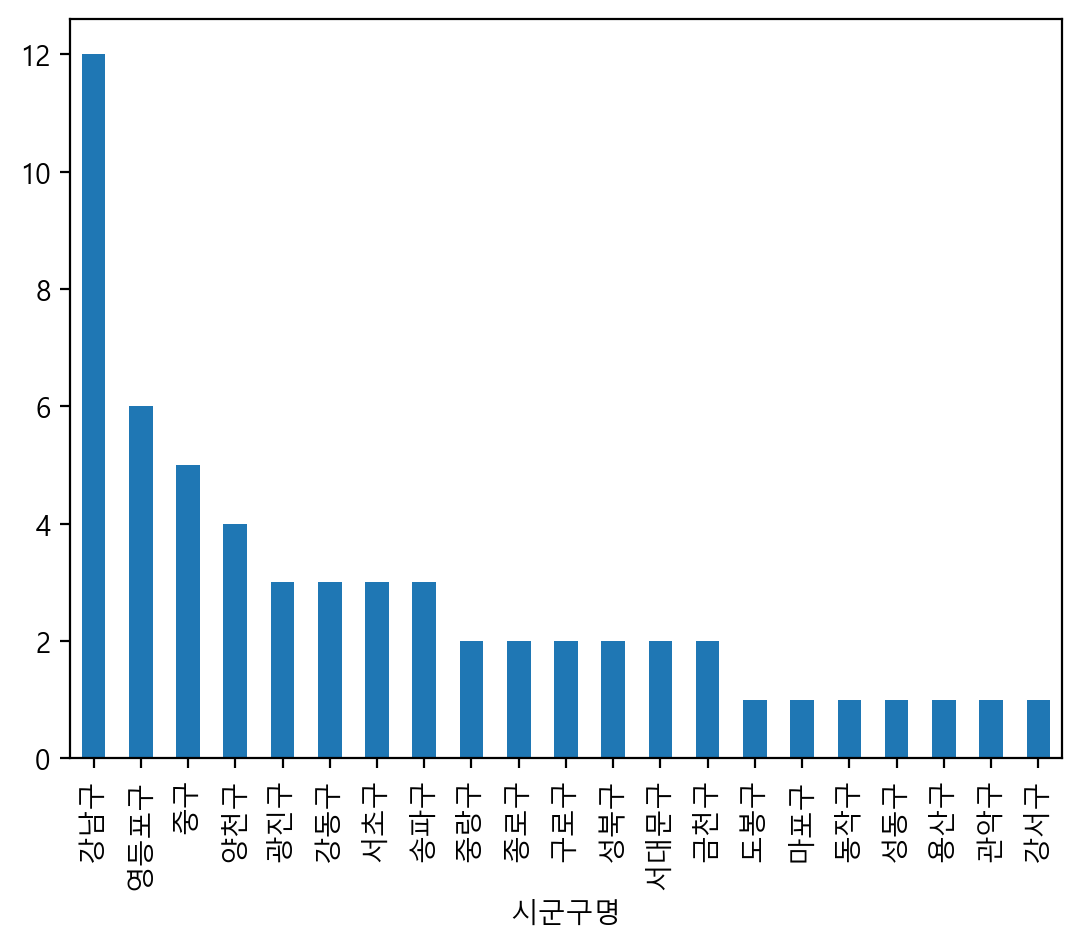

In [72]:
df_seoul_hospital['시군구명'].value_counts().plot.bar()

##### * 시군구명에 따라 종합병원의 숫자를 countplot으로 그림

<Axes: xlabel='시군구명', ylabel='count'>

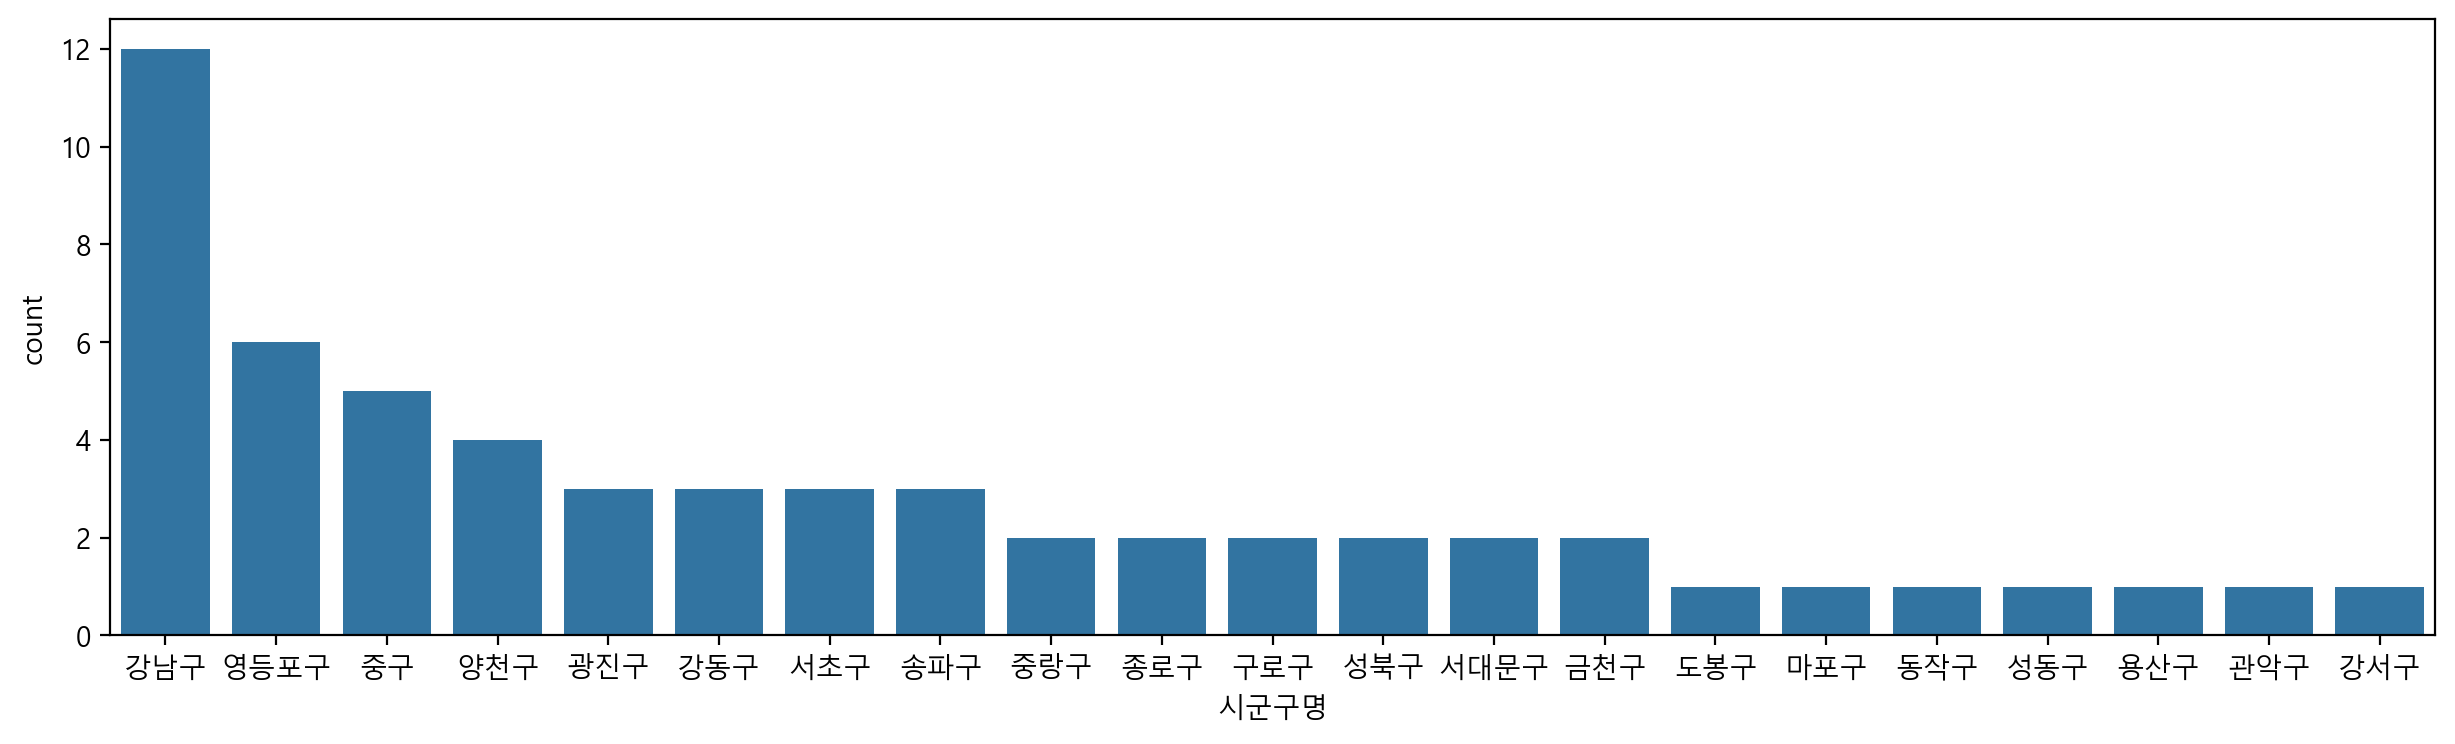

In [75]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x='시군구명',order=df_seoul_hospital['시군구명'].value_counts().index)

### 특정 지역만 보기

##### * 서울에 있는 데이터만 추출해서 df_seoul이라는 변수에 할당
##### *shape를 통해 행렬의 차원을 튜플 형식으로 반환

In [77]:
df_seoul= df[df['시도명']=='서울특별시'].copy()
df_seoul.shape

(18943, 39)

##### *df_seoul을 시군구명으로 bar plot을 그려 시각화함

<Axes: xlabel='시군구명'>

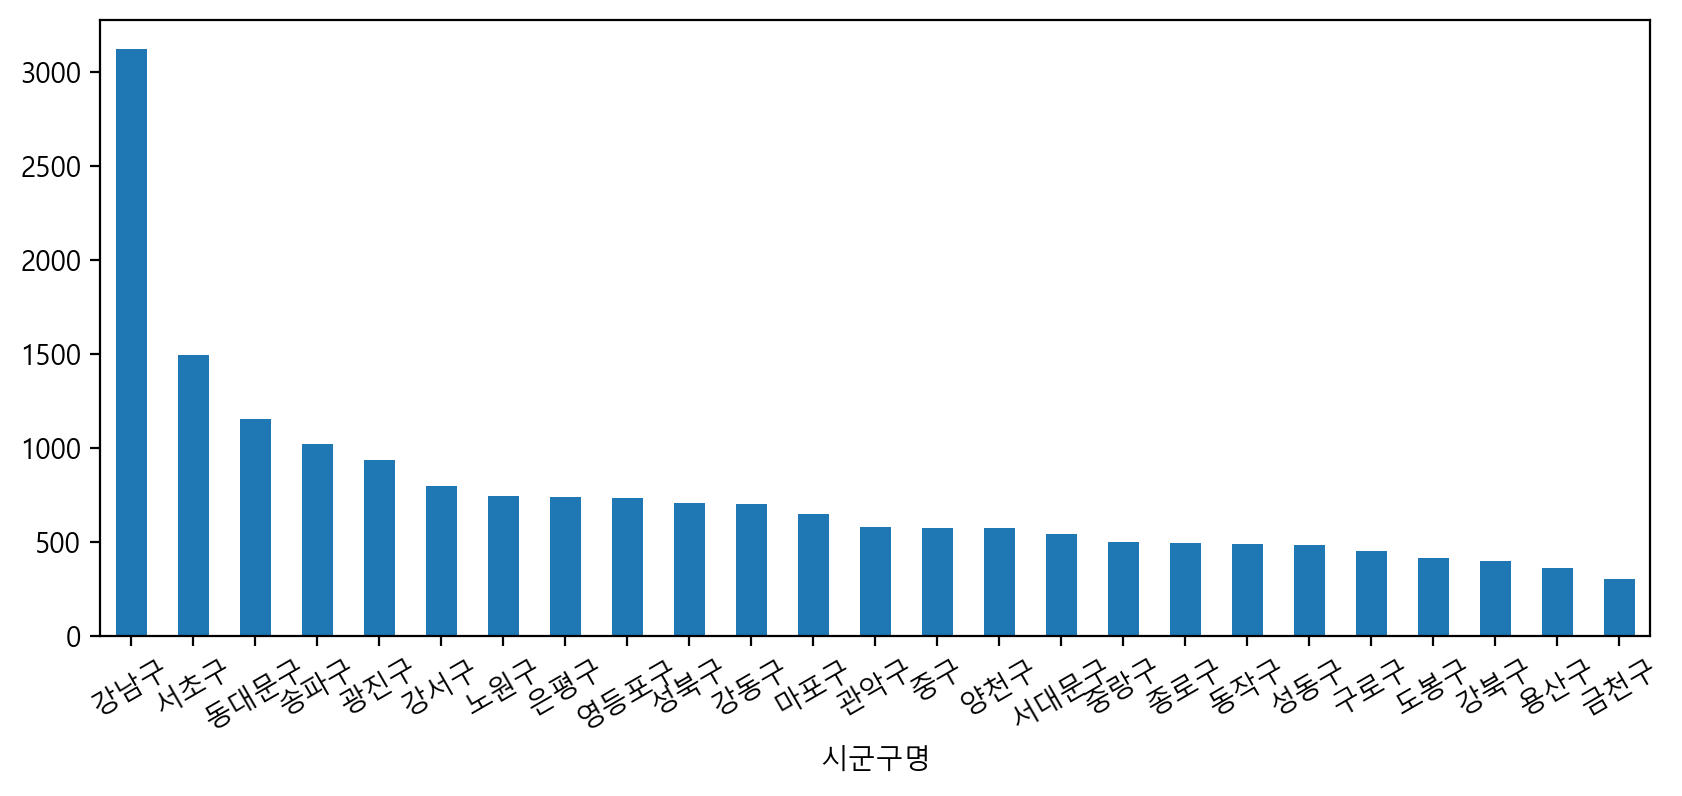

In [79]:
df_seoul['시군구명'].value_counts().plot.bar(figsize=(10,4),rot=30)

##### *시군구명을 countplot을 통해 그림

<Axes: xlabel='시군구명', ylabel='count'>

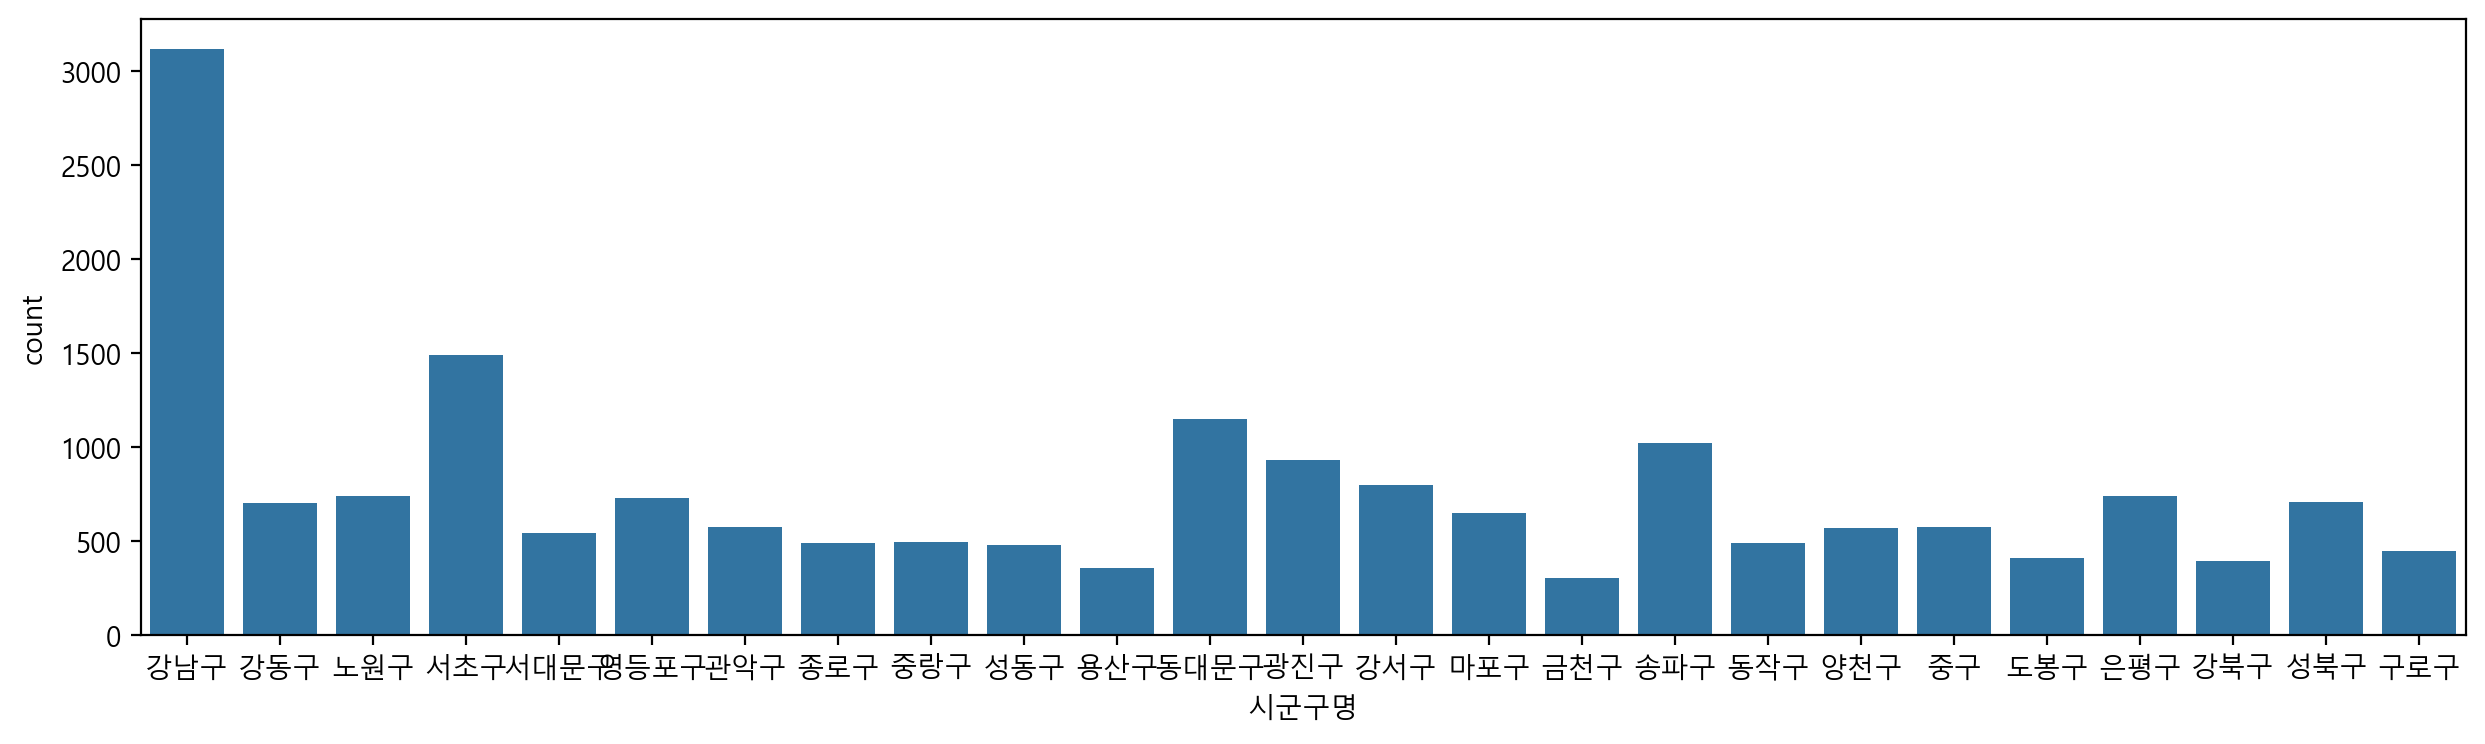

In [81]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul, x='시군구명')

##### * plot.scatter(x= ,y= )를 통해 경도와 위도 표시
##### * 산점도(Scatter Plot): 두 연속변수간의 상관관계를 확인하기에 유용함
##### *서울 지역 데이터프레임 df_seoul에서 각 지점의 경도와 위도 정보를 이용해 지도처럼 산점도를 그림

<Axes: xlabel='경도', ylabel='위도'>

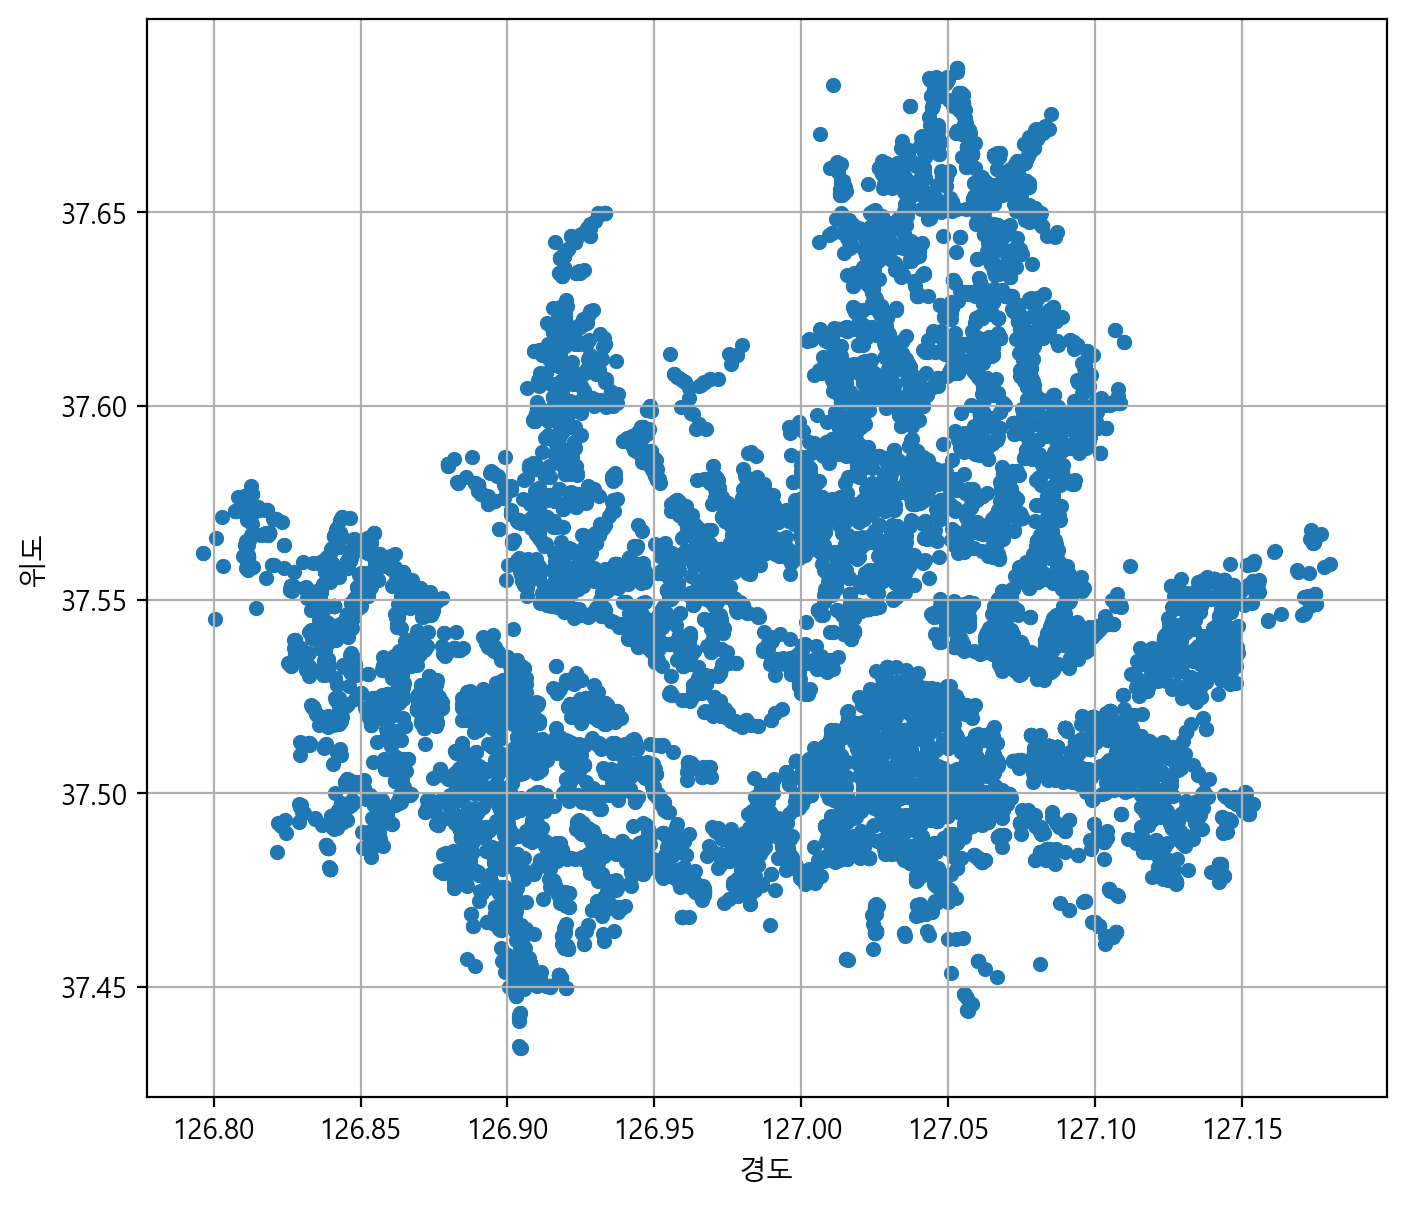

In [83]:
df_seoul[['경도', '위도', '시군구명']].plot.scatter(x="경도", y='위도', figsize=(8,7), grid=True)

##### *seaborn의 scatterplot을 통해 '상권업종중분류명' 경도와 위도 표시함
##### *sns.scatterplot()을 이용해 산점도를 그릴 수 있음
##### *hue: 산점도 그래프에서 데이터 포인트를 색상으로 구분하여 범주형 변수를 시각화하는 데 사용됨

<Axes: xlabel='경도', ylabel='위도'>

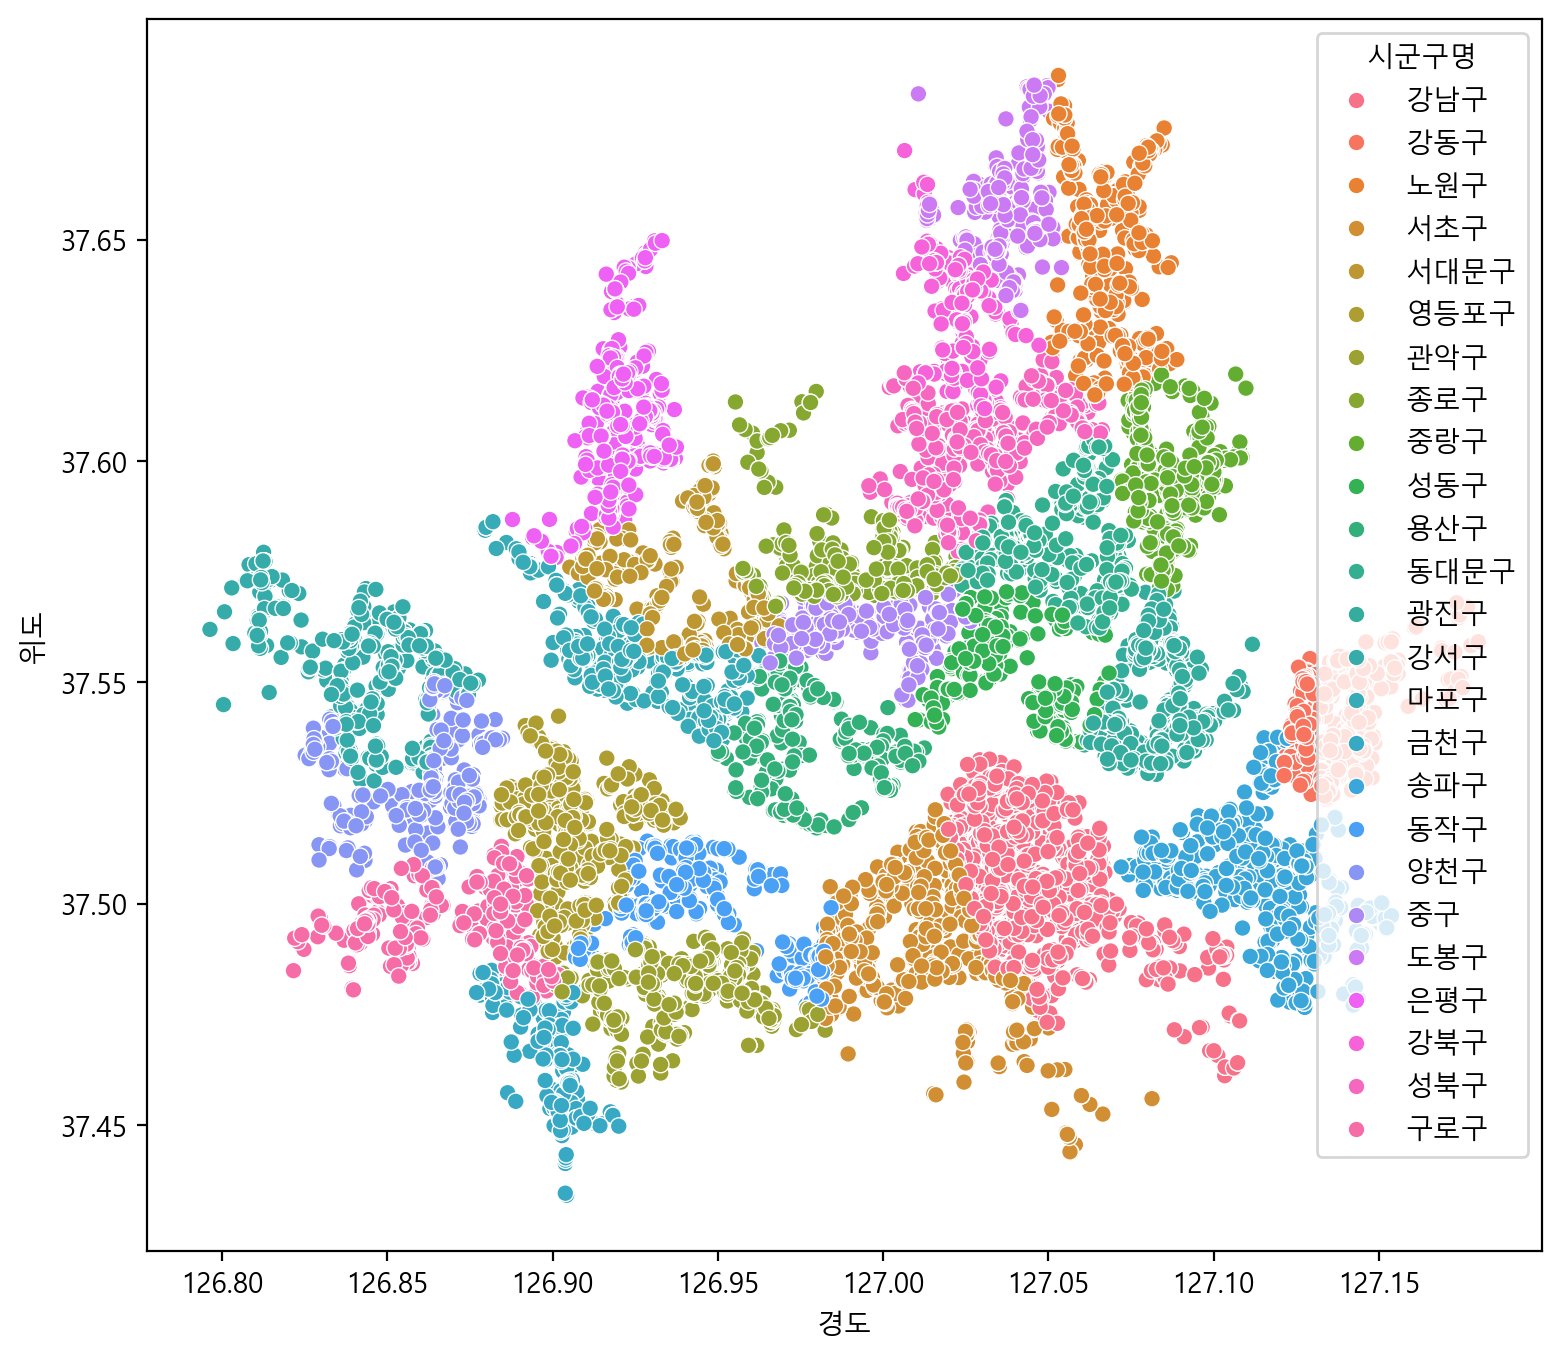

In [85]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul, x='경도', y='위도', hue='시군구명')

##### *전국 데이터(df)로 경도와 위도를 표시함

<Axes: xlabel='경도', ylabel='위도'>

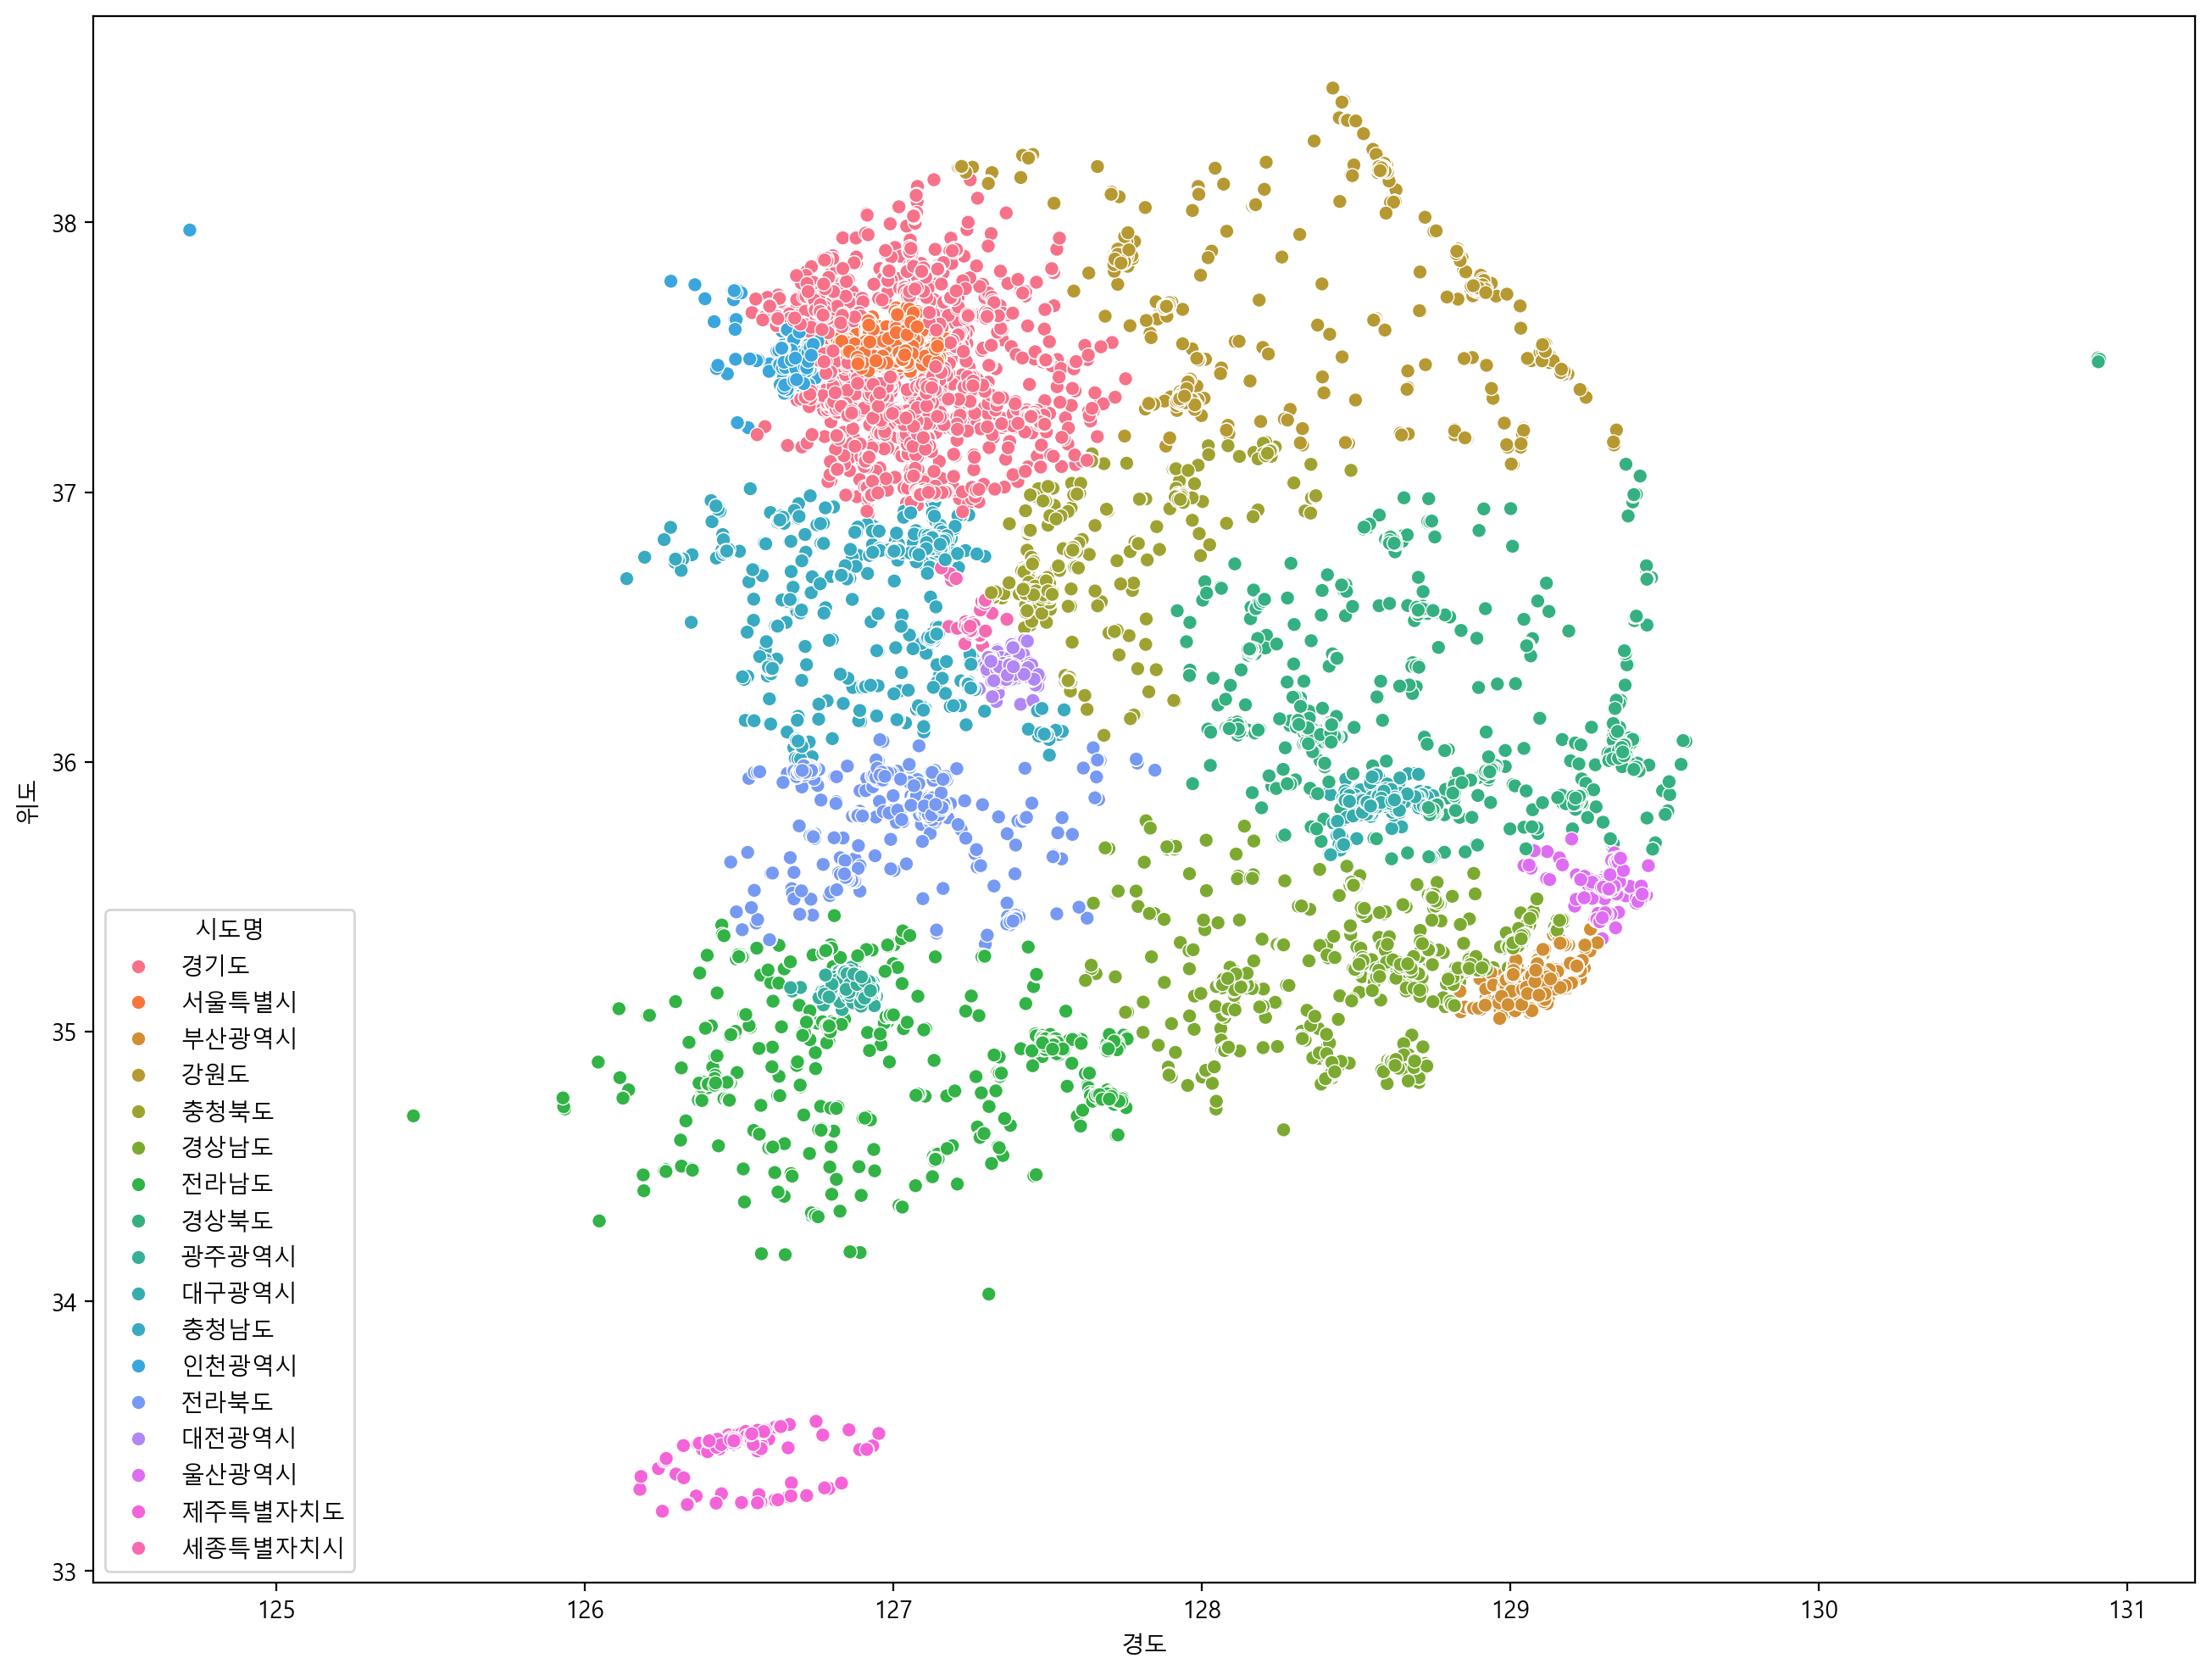

In [86]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df, x='경도', y='위도', hue='시도명')

##### *folium: 지도 시각화를 위한 라이브러리

In [91]:
import folium

##### *지도의 중심을 지정하기 위해 위도와 경도의 평균을 구함

In [93]:
df_seoul_hospital['위도'].mean()
df_seoul_hospital['경도'].mean()

126.9963589356625

##### *서울에 있는 병원 데이터의 평균 위치를 중심으로 하는 서울시 전체 범위의 지도를 folium으로 생성한 코드

In [98]:
map=folium.Map(location=[df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()], zoom_start=12)
map

##### *서울에 있는 종합병원의 주소를 마커로 표시하는 지도 출력
##### *for n in df_seoul_hospital.index: df_seoul_hospital의 모든 행 인덱스를 하나씩 반복함
#####                                    즉, 병원 데이터의 각 행을 순서대로 하나씩 처리하는 루프
##### *n번째 행의 "상호명"과 "도로명 주소"를 가져옴
##### *popup = f"{name}-{address}": 마커를 클릭했을 때 뜨는 풍선말(popup) 텍스트를 구성
##### *location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
#####     :folium은 [위도, 경도] 순서로 좌표를 받기 때문에 해당 병원의 위치 좌표를 리스트로 만듦
##### *folium.Marker(...): 지도 위에 하나의 마커를 생성하는 코드
##### *.add_to(map): 위에서 만든 마커를 미리 생성해둔 map 객체에 추가

In [99]:
for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    folium.Marker(
        location= location,
        popup= popup,
    ).add_to(map)
map